##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 13***

---
(*In Title case, separated with commas*)
***Full names of all students in the team: ANIRUDH BAGALKOTKER, KARTIK PANDEY, ADWAIT KULKARNI, JOY SINHA***

---
(*Separated by commas*)
***Id number of all students in the team: 2021A7PS2682H, 2021A7PS2574H, 2021A7PS2995H, 2021A8PS1606H***


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

### **Import Dependencies and Load Dataset**

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [156]:
# Load the dataset
df = pd.read_csv('./water_portability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### **Exploratory Data Analysis**

In [157]:
df.shape

(3276, 10)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [159]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [160]:
df['Potability'].value_counts(normalize=True)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

In [161]:
df.drop('Potability', axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

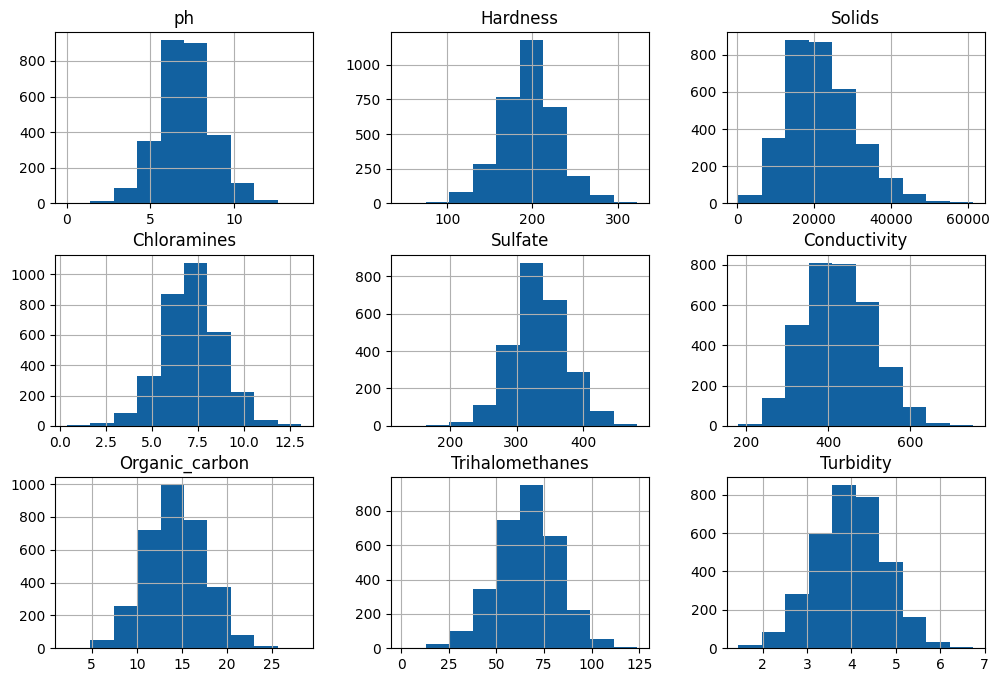

In [162]:
df.drop('Potability', axis = 1).hist(figsize=(12,8), color="#1261A0");

In [163]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [164]:
fig = go.Figure(go.Heatmap(z=df.corr(), x=df.corr().columns.tolist(), y=df.corr().columns.tolist(), colorscale='Viridis'))
fig.show()

### **Data Preprocessing**

In [165]:
# Check if there are any missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [166]:
# Handle missing values (if any) by replacing them with the mean
df.fillna(df.mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [167]:
# Normalize the dataset (Check if the column name is not "Potability". if not then apply normalization)
for col in df.columns:
    if col != 'Potability':
        df[col] = (df[col] - np.mean(df[col])) / np.std(df[col])
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,0


### **Generate Random Test and Train Splits**

In [168]:
seed = 420
train_fraction = 0.8
train = df.sample(frac=train_fraction, random_state=seed)
test = df.drop(train.index)

In [169]:
train.info

<bound method DataFrame.info of                 ph  Hardness    Solids  Chloramines       Sulfate  \
2043  3.216080e-02 -0.151140  0.366530    -0.325005 -4.019393e-01   
1952 -4.328949e-01 -0.904473  0.324132     1.497359 -1.282986e+00   
3236 -1.573976e+00  1.827556  2.964878    -0.852325  3.145987e-15   
1434  1.644569e-01 -0.008067 -0.282834    -0.291323 -9.943908e-01   
2725  4.763279e-01  0.774911  2.106667    -0.616725 -8.701890e-01   
...            ...       ...       ...          ...           ...   
861  -6.043133e-16 -0.353426  0.739688    -0.361530 -8.457315e-02   
51    4.958983e-01 -2.917494 -1.140673    -1.206665 -2.395736e+00   
1673  5.413918e-01  1.658633 -0.715506     0.602373  3.145987e-15   
1018 -7.264140e-01  0.683618 -0.050226     1.373209 -3.488787e-01   
362  -1.390345e-01 -0.168062 -0.003999    -0.942430  8.317196e-01   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2043     -0.085385       -0.429187         0.765639   0.696956

In [170]:
test.info

<bound method DataFrame.info of                 ph  Hardness    Solids  Chloramines       Sulfate  \
2     6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15   
3     8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01   
5    -1.018355e+00 -0.245057  0.768155     0.266983 -1.964024e-01   
15   -4.990862e-01 -0.293131  2.172994     1.584061  8.498721e-01   
18    1.289126e+00  2.524360 -0.291277    -0.579941  3.145987e-15   
...            ...       ...       ...          ...           ...   
3257 -2.704077e-01  2.303963 -0.345009    -1.128397  7.691054e-02   
3260 -6.043133e-16 -1.874772 -1.484399     1.202909  3.145987e-15   
3262  8.826874e-01  0.065148  0.736847    -0.407634 -3.956762e-01   
3265  7.597026e-01  0.204887  0.648745    -0.410251 -1.352887e-01   
3274 -1.329516e+00  1.041355 -1.144058    -0.517373  3.145987e-15   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2        -0.094032        0.781117         0.001509  -1.167365

In [171]:
# Assuming 'Potability' is the column you want to predict
X_train = train.drop('Potability', axis=1)  # Features for training
y_train = train['Potability']  # Target for training

X_test = test.drop('Potability', axis=1)  # Features for testing
y_test = test['Potability']  # Target for testing

# Convert labels to numpy array for applying ML Models
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# ***2. ML Model 1: Perceptron***

In [172]:
# Implementing Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                # Calculate the predicted value
                predicted = self.predict(xi)
                
                # Update weights and bias based on the perceptron learning rule
                update = self.learning_rate * (target - predicted)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        # Calculate the dot product of weights and input features, add bias, and apply the step function
        return np.where(np.dot(X, self.weights) + self.bias > 0, 1, 0)

# Instantiate the Perceptron model
perceptron_model = Perceptron(learning_rate=0.01, epochs=100)

# Train the model
perceptron_model.train(X_train.values, y_train)

# Make predictions on the test set
predictions = perceptron_model.predict(X_test.values)

# Evaluate the accuracy of the model
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy*100, "%")

Accuracy: 53.58778625954198 %


# ***3. ML Model 2: Fisher Discriminant***



# ***4. ML Model 3: KNN***

# ***5. ML Model 4 (Based on research literature): QDA***

# ***6. Comparison of insights drawn from the models***

# **_7. References_**

1.   Dataset Description - https://www.hindawi.com/journals/cin/2022/9283293/
2.   EDA and Data Cleaning - https://www.kaggle.com/code/charmainechiam/dealing-with-missing-values-in-data-preparation

